<u>**DATA EXPLORATION**</u>

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


In [2]:

# Reading the CSV file into a DataFrame
dataframe = pd.read_csv(r"C:\Users\Aarya\Desktop\NEXUS\TwitterSentiment.csv")


In [3]:
# Dsiplaying the number of rows and columns present in the dataframe respectively
dataframe.shape

(1599999, 6)

In [4]:
# Listing the names of all the columns present in the dataframe
dataframe.columns

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

In [5]:
# Basic information about the dataframe df: rows , columns , types 
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [6]:

# Defining the column names
column_names = ['Target', 'ID', 'Date', 'Flag', 'Username', 'Tweet']

# Reading the CSV file into a DataFrame with specified column names
df = pd.read_csv( r"C:\Users\Aarya\Desktop\NEXUS\TwitterSentiment.csv", names=column_names )


In [8]:
df.head()

,Target,ID,Date,Flag,Username,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


 <u>**DATA CLEANING**</u>

In [10]:
# checking for any null values in the dataframe
df.isnull().sum()

Target      0
ID          0
Date        0
Flag        0
Username    0
Tweet       0
dtype: int64

In [11]:
# Finding duplicate entries
duplicate_entries = df.duplicated()
print("Duplicate entries:")
print(df[duplicate_entries])


Duplicate entries:
Empty DataFrame
Columns: [Target, ID, Date, Flag, Username, Tweet]
Index: []


In [21]:
#Changing the datatype of 'Date'
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype              
---  ------    --------------    -----              
 0   Target    1600000 non-null  int64              
 1   ID        1600000 non-null  int64              
 2   Date      1600000 non-null  datetime64[ns, UTC]
 3   Flag      1600000 non-null  object             
 4   Username  1600000 non-null  object             
 5   Tweet     1600000 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 73.2+ MB


<u>**EXPLORATORY DATA ANALYSIS (EDA)**</u>

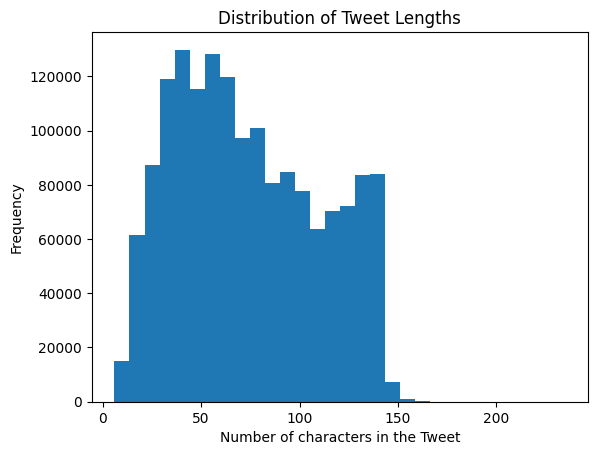

In [22]:
df['Number of characters in the Tweet'] = df['Tweet'].apply(len)
plt.hist(df['Number of characters in the Tweet'], bins=30)
plt.xlabel('Number of characters in the Tweet')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths')
plt.show()

In [23]:
# Finding the number of unique IDs

print("Number of total IDs:", df['ID'].count())
print("Number of unique IDs:", df['ID'].nunique())


Number of total IDs: 1600000
Number of unique IDs: 1598315


**<u>SENTIMENT DISTRIBUTION</u>**

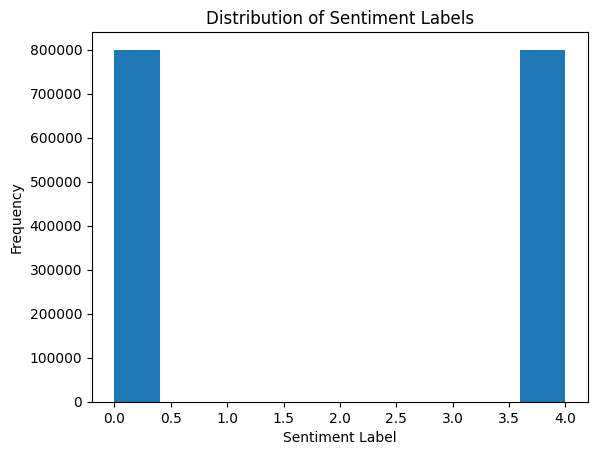

In [24]:
# Ploting histogram of sentiment labels
plt.hist(df['Target'])
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Labels')
plt.show()


In [25]:
df.head()

,Target,ID,Date,Flag,Username,Tweet,Number of characters in the Tweet
0,0,1467810369,2009-04-06 22:19:45+00:00,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,1467810672,2009-04-06 22:19:49+00:00,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111
2,0,1467810917,2009-04-06 22:19:53+00:00,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89
3,0,1467811184,2009-04-06 22:19:57+00:00,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47
4,0,1467811193,2009-04-06 22:19:57+00:00,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111


**<u>WORD FREQUENCY ANALYSIS</u>**

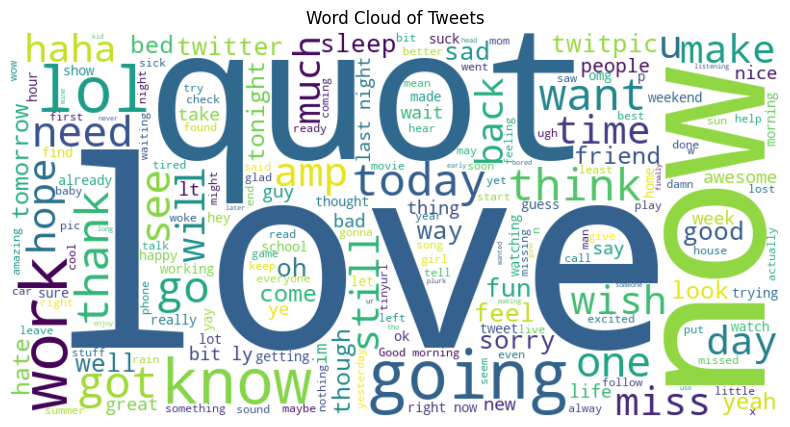

In [26]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Tweet']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()

**<u>TEMPORAL ANALYSIS</u>**

In [28]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['DayOfWeek'] = df['Date'].dt.dayofweek

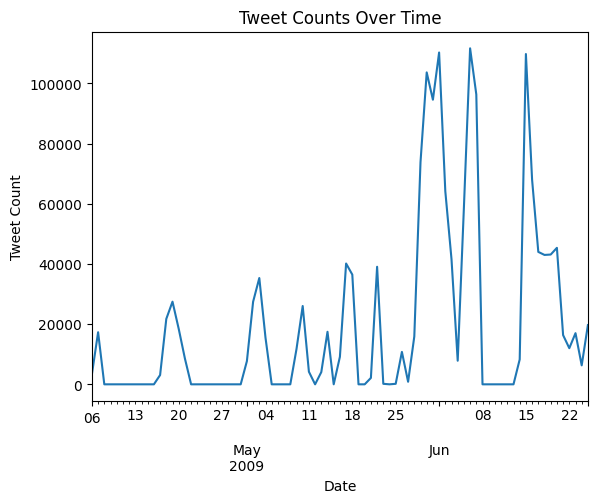

In [29]:
df.set_index('Date').resample('D').size().plot()
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title('Tweet Counts Over Time')
plt.show()

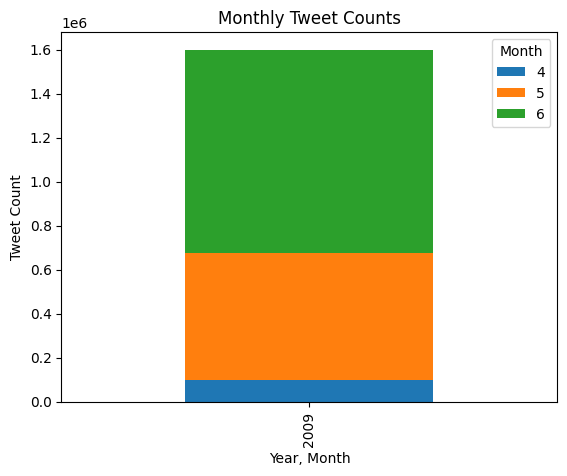

In [30]:
df.groupby(['Year', 'Month']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Year, Month')
plt.ylabel('Tweet Count')
plt.title('Monthly Tweet Counts')
plt.show()


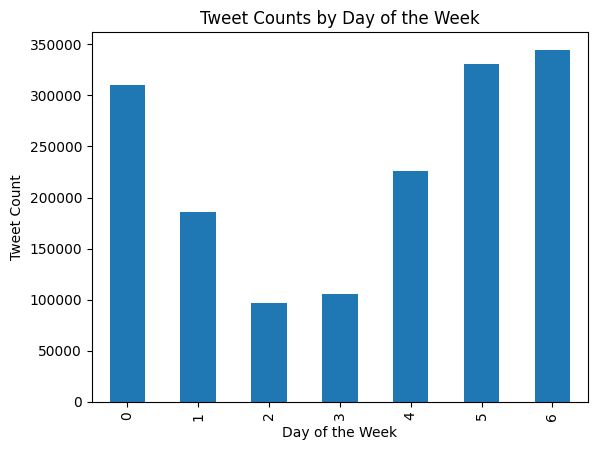

In [31]:
df.groupby('DayOfWeek').size().plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Tweet Count')
plt.title('Tweet Counts by Day of the Week')
plt.show()


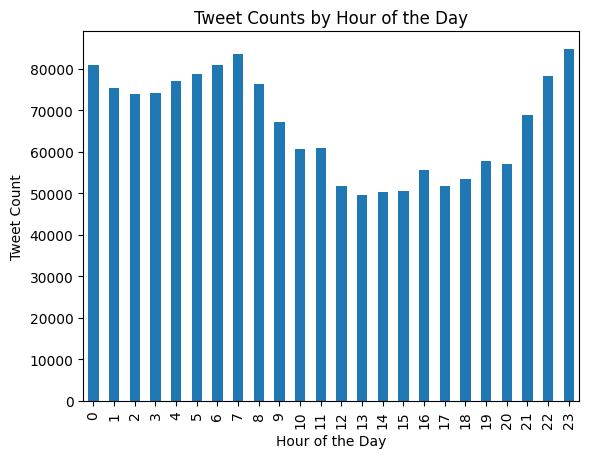

In [32]:
df.groupby('Hour').size().plot(kind='bar')
plt.xlabel('Hour of the Day')
plt.ylabel('Tweet Count')
plt.title('Tweet Counts by Hour of the Day')
plt.show()


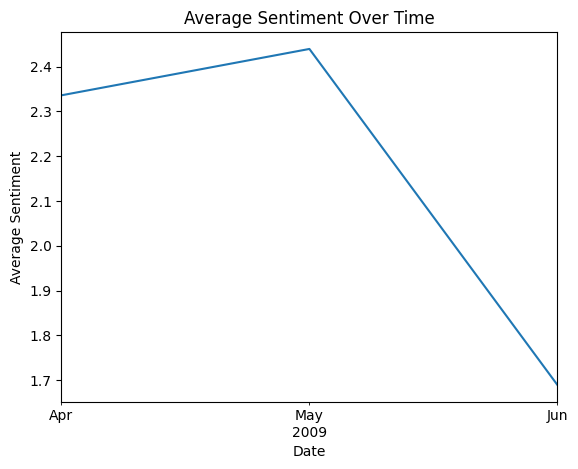

In [33]:
df.set_index('Date').resample('ME')['Target'].mean().plot()
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment Over Time')
plt.show()


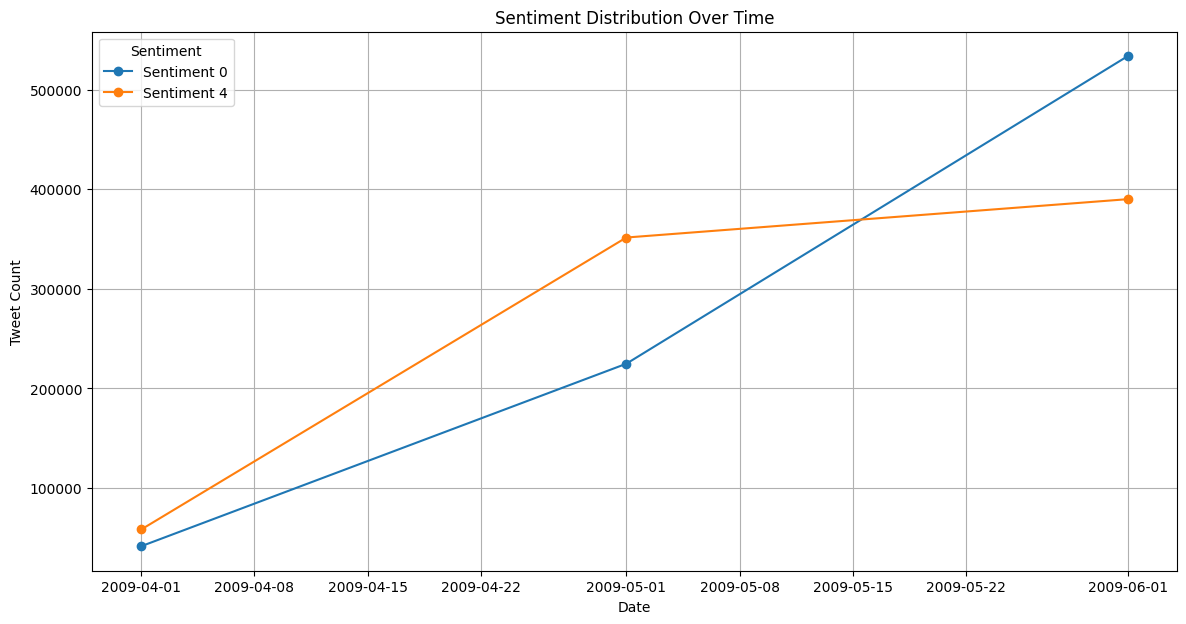

In [35]:
# Calculating sentiment distribution over time (count of each sentiment class)
monthly_sentiment_distribution = df.groupby(['Year', 'Month', 'Target']).size().unstack(fill_value=0).reset_index()

# Creating a datetime column for plotting
monthly_sentiment_distribution['YearMonth'] = pd.to_datetime(monthly_sentiment_distribution[['Year', 'Month']].assign(DAY=1))

# Plotting the sentiment distribution over time
plt.figure(figsize=(14, 7))
for sentiment in monthly_sentiment_distribution.columns[2:-1]:  # Exclude 'Year', 'Month', and 'YearMonth'
    plt.plot(monthly_sentiment_distribution['YearMonth'], monthly_sentiment_distribution[sentiment], marker='o', label=f'Sentiment {sentiment}')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title('Sentiment Distribution Over Time')
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()


**<u>TEXT PREPROCESSING</u>**

In [38]:
df.columns

Index(['Target', 'ID', 'Date', 'Flag', 'Username', 'Tweet',
       'Number of characters in the Tweet', 'Year', 'Month', 'Day', 'Hour',
       'DayOfWeek'],
      dtype='object')

In [39]:
df.drop(['Flag'], axis=1, inplace=True)


In [40]:
df.head()

,Target,ID,Date,Username,Tweet,Number of characters in the Tweet,Year,Month,Day,Hour,DayOfWeek
0,0,1467810369,2009-04-06 22:19:45+00:00,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,2009,4,6,22,0
1,0,1467810672,2009-04-06 22:19:49+00:00,scotthamilton,is upset that he can't update his Facebook by ...,111,2009,4,6,22,0
2,0,1467810917,2009-04-06 22:19:53+00:00,mattycus,@Kenichan I dived many times for the ball. Man...,89,2009,4,6,22,0
3,0,1467811184,2009-04-06 22:19:57+00:00,ElleCTF,my whole body feels itchy and like its on fire,47,2009,4,6,22,0
4,0,1467811193,2009-04-06 22:19:57+00:00,Karoli,"@nationwideclass no, it's not behaving at all....",111,2009,4,6,22,0


In [41]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Defining a function to clean tweets

def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)

    # Remove special characters
    tweet = re.sub(r'\@\w+|\#','', tweet)
    tweet = re.sub(r'[^A-Za-z0-9\s]+', '', tweet)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tweet = ' '.join([word for word in tweet.split() if word.lower() not in stop_words])
    return tweet


df['Cleaned_Tweet'] = df['Tweet'].apply(clean_tweet)
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Target,ID,Date,Username,Tweet,Number of characters in the Tweet,Year,Month,Day,Hour,DayOfWeek,Cleaned_Tweet
0,0,1467810369,2009-04-06 22:19:45+00:00,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,2009,4,6,22,0,thats bummer shoulda got David Carr Third Day
1,0,1467810672,2009-04-06 22:19:49+00:00,scotthamilton,is upset that he can't update his Facebook by ...,111,2009,4,6,22,0,upset cant update Facebook texting might cry r...
2,0,1467810917,2009-04-06 22:19:53+00:00,mattycus,@Kenichan I dived many times for the ball. Man...,89,2009,4,6,22,0,dived many times ball Managed save 50 rest go ...
3,0,1467811184,2009-04-06 22:19:57+00:00,ElleCTF,my whole body feels itchy and like its on fire,47,2009,4,6,22,0,whole body feels itchy like fire
4,0,1467811193,2009-04-06 22:19:57+00:00,Karoli,"@nationwideclass no, it's not behaving at all....",111,2009,4,6,22,0,behaving im mad cant see


In [72]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from joblib import Parallel, delayed

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [47]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure the necessary NLTK data packages are downloaded
nltk.download('punkt')
nltk.download('wordnet')


# Function to tokenize and lemmatize text
def tokenize_and_lemmatize(text):
    # Tokenize the text into words
    tokens = word_tokenize(text)
    
    # Initialize WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize each tokenized word
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Return the lemmatized tokens as a string
    return ' '.join(lemmatized_tokens)

# Apply tokenization and lemmatization to the 'Tweet' column
df['Processed_Tweet'] = df['Tweet'].apply(tokenize_and_lemmatize)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [48]:
df.head()

,Target,ID,Date,Username,Tweet,Number of characters in the Tweet,Year,Month,Day,Hour,DayOfWeek,Cleaned_Tweet,Processed_Tweet
0,0,1467810369,2009-04-06 22:19:45+00:00,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,2009,4,6,22,0,thats bummer shoulda got David Carr Third Day,@ switchfoot http : //twitpic.com/2y1zl - Awww...
1,0,1467810672,2009-04-06 22:19:49+00:00,scotthamilton,is upset that he can't update his Facebook by ...,111,2009,4,6,22,0,upset cant update Facebook texting might cry r...,is upset that he ca n't update his Facebook by...
2,0,1467810917,2009-04-06 22:19:53+00:00,mattycus,@Kenichan I dived many times for the ball. Man...,89,2009,4,6,22,0,dived many times ball Managed save 50 rest go ...,@ Kenichan I dived many time for the ball . Ma...
3,0,1467811184,2009-04-06 22:19:57+00:00,ElleCTF,my whole body feels itchy and like its on fire,47,2009,4,6,22,0,whole body feels itchy like fire,my whole body feel itchy and like it on fire
4,0,1467811193,2009-04-06 22:19:57+00:00,Karoli,"@nationwideclass no, it's not behaving at all....",111,2009,4,6,22,0,behaving im mad cant see,"@ nationwideclass no , it 's not behaving at a..."


**<u>SENTIMENT PREDICTION MODEL</u>**

In [50]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

# Ensure the necessary NLTK data packages are downloaded
nltk.download('punkt')
nltk.download('wordnet')
# Initializing the CountVectorizer
vectorizer = CountVectorizer()

# Fitting and transforming the cleaned tweets to BoW (keeping it in sparse format)
bow_matrix = vectorizer.fit_transform(df['Cleaned_Tweet'])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [52]:
# Initializing the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fitting and transforming the cleaned tweets to TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_Tweet'])



In [58]:
import spacy
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from joblib import Parallel, delayed

# Load SpaCy model with disabled pipeline components
nlp = spacy.load('en_core_web_md', disable=['tagger', 'parser', 'ner'])

# Function to get the mean vector for a document
def get_mean_vector(text):
    doc = nlp(text)
    return doc.vector

# Function to apply get_mean_vector in parallel
def parallel_apply(texts, func, num_cores=4):
    results = Parallel(n_jobs=num_cores)(delayed(func)(text) for text in texts)
    return results



# Apply the SpaCy model to get embeddings in parallel
num_cores = 4  # Adjust the number of cores based on your machine
df['Tweet_Vector'] = parallel_apply(df['Cleaned_Tweet'], get_mean_vector, num_cores=num_cores)

# Convert list of vectors to a writable array
X = np.array(df['Tweet_Vector'].tolist())
X = np.copy(X)  # Ensure the array is writable
y = df['Target'].values




ValueError: buffer source array is read-only

In [80]:
df.head()

,Target,ID,Date,Username,Tweet,Number of characters in the Tweet,Year,Month,Day,Hour,DayOfWeek,Cleaned_Tweet
0,0,1467810369,2009-04-06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,2009,4,6,22,0,thats bummer shoulda got David Carr Third Day
1,0,1467810672,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,111,2009,4,6,22,0,upset cant update Facebook texting might cry r...
2,0,1467810917,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...,89,2009,4,6,22,0,dived many time ball Managed save 50 rest go b...
3,0,1467811184,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,47,2009,4,6,22,0,whole body feel itchy like fire
4,0,1467811193,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all....",111,2009,4,6,22,0,behaving im mad cant see


In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Tweet'], df['Target'], test_size=0.2, random_state=42)
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train_tfidf, y_train)

from sklearn.metrics import classification_report

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))


In [85]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Solver
}

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=200)

# Initialize GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=3, scoring='f1_weighted', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_tfidf, y_train)

# Get the best estimator
best_log_reg = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_log_reg.predict(X_test_tfidf)

# Evaluate the best model
print(classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 8 candidates, totalling 24 fits
              precision    recall  f1-score   support

           0       0.79      0.77      0.78    159494
           4       0.78      0.80      0.79    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


          feature  coefficient  abs_coefficient
277642        sad   -12.453839        12.453839
277854      sadly    -8.700088         8.700088
55279      bummed    -8.232198         8.232198
135743     gutted    -8.219987         8.219987
58977   cancelled    -7.886570         7.886570
273227        rip    -7.743745         7.743745
203285       miss    -7.586309         7.586309
290497       sick    -7.154929         7.154929
276411     ruined    -7.005322         7.005322
87179   depressed    -6.894383         6.894383


C:\Users\Aarya\AppData\Local\Temp\ipykernel_6692\1214856584.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='abs_coefficient', y='feature', data=top_features, palette='viridis')


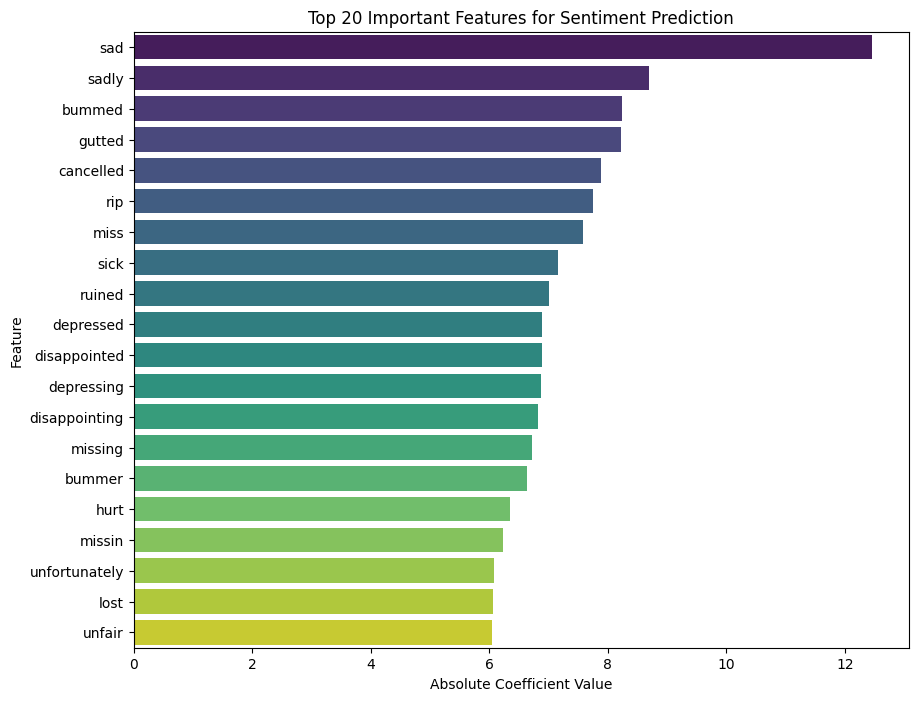

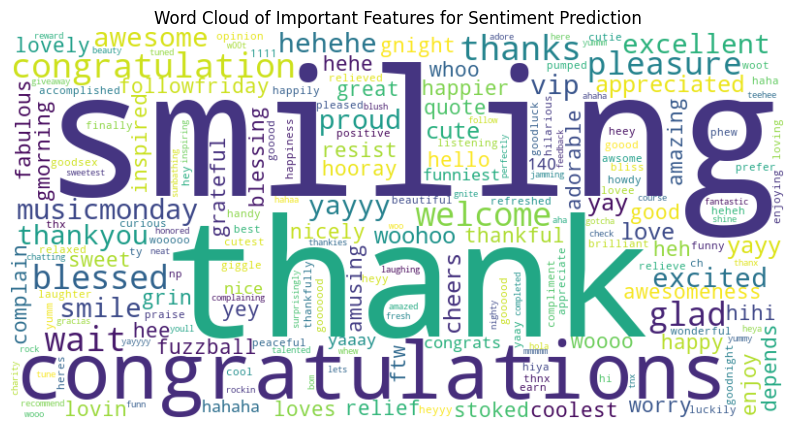

In [86]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the coefficients from the logistic regression model
coefficients = model.coef_[0]

# Create a DataFrame with feature names and their corresponding coefficients
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients
})

# Sort the DataFrame by the absolute value of the coefficients
feature_importance['abs_coefficient'] = feature_importance['coefficient'].abs()
feature_importance = feature_importance.sort_values(by='abs_coefficient', ascending=False)

# Display the top 10 most important features
print(feature_importance.head(10))

# Get the top 20 most important features
top_features = feature_importance.head(20)

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='abs_coefficient', y='feature', data=top_features, palette='viridis')
plt.title('Top 20 Important Features for Sentiment Prediction')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    {word: coeff for word, coeff in zip(feature_importance['feature'], feature_importance['coefficient'])}
)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Important Features for Sentiment Prediction')
plt.show()
